In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Model
from tensorflow.keras.applications import imagenet_utils
from sklearn.metrics import confusion_matrix
import itertools
import os
import shutil
import random
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))
tf.config.experimental.set_memory_growth(physical_devices[0], True)

Num GPUs Available:  1


In [3]:
mobile = tf.keras.applications.mobilenet.MobileNet()

In [4]:
os.chdir('D:/Dataset COVID-19 Augmented')
if os.path.isdir('D:/Dataset COVID-19 Augmented/COVID-19') is False:
    os.makedirs('D:/Dataset COVID-19 Augmented/train/covid')
    os.makedirs('D:/Dataset COVID-19 Augmented/train/noncovid')
    os.makedirs('D:/Dataset COVID-19 Augmented/valid/covid')
    os.makedirs('D:/Dataset COVID-19 Augmented/valid/noncovid')
    os.makedirs('D:/Dataset COVID-19 Augmented/test/covid')
    os.makedirs('D:/Dataset COVID-19 Augmented/test/noncovid')
    
    for i in random.sample(glob.glob('D:/Dataset COVID-19 Augmented/COVID-19/*'),700):
        shutil.move(i,'D:/Dataset COVID-19 Augmented/train/covid')
    for i in random.sample(glob.glob('D:/Dataset COVID-19 Augmented/Non-COVID-19/*'),700):
        shutil.move(i,'D:/Dataset COVID-19 Augmented/train/noncovid')
    for i in random.sample(glob.glob('D:/Dataset COVID-19 Augmented/COVID-19/*'),100):
        shutil.move(i,'D:/Dataset COVID-19 Augmented/valid/covid')
    for i in random.sample(glob.glob('D:/Dataset COVID-19 Augmented/Non-COVID-19/*'),100):
        shutil.move(i,'D:/Dataset COVID-19 Augmented/valid/noncovid')
    for i in random.sample(glob.glob('D:/Dataset COVID-19 Augmented/COVID-19/*'),100):
        shutil.move(i,'D:/Dataset COVID-19 Augmented/test/covid')
    for i in random.sample(glob.glob('D:/Dataset COVID-19 Augmented/Non-COVID-19/*'),100):
        shutil.move(i,'D:/Dataset COVID-19 Augmented/test/noncovid')
os.chdir('../../')

In [5]:
train_path = 'D:/Dataset COVID-19 Augmented/train'
valid_path = 'D:/Dataset COVID-19 Augmented/valid'
test_path = 'D:/Dataset COVID-19 Augmented/test'

In [6]:
train_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=train_path, target_size=(224,224), classes=['covid', 'noncovid'], batch_size=10)
valid_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=valid_path, target_size=(224,224), classes=['covid', 'noncovid'], batch_size=10)
test_batches = ImageDataGenerator(preprocessing_function=tf.keras.applications.mobilenet.preprocess_input) \
    .flow_from_directory(directory=test_path, target_size=(224,224), classes=['covid', 'noncovid'], batch_size=10, shuffle=False)

Found 1400 images belonging to 2 classes.
Found 200 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [7]:
x = mobile.layers[-6].output

In [8]:
output = Dense(units=2, activation='softmax')(x)

In [9]:
model = Model(inputs=mobile.input, outputs=output)

In [10]:
for layer in model.layers[:-5]:
    layer.trainable = False

In [11]:
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     

In [12]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [14]:
model.fit(x=train_batches,
          steps_per_epoch=len(train_batches),
          validation_data=valid_batches,
          validation_steps=len(valid_batches),
          epochs=5,
          verbose=2
)

Epoch 1/5
140/140 - 15s - loss: 0.0045 - accuracy: 0.9986 - val_loss: 5.1150e-05 - val_accuracy: 1.0000
Epoch 2/5
140/140 - 14s - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.8793e-05 - val_accuracy: 1.0000
Epoch 3/5
140/140 - 14s - loss: 0.0019 - accuracy: 1.0000 - val_loss: 2.1402e-05 - val_accuracy: 1.0000
Epoch 4/5
140/140 - 14s - loss: 0.0118 - accuracy: 0.9957 - val_loss: 0.0350 - val_accuracy: 0.9850
Epoch 5/5
140/140 - 15s - loss: 0.0034 - accuracy: 0.9993 - val_loss: 1.5186e-04 - val_accuracy: 1.0000


In [15]:
predictions = model.predict(x=test_batches, steps=len(test_batches), verbose=0)

In [16]:
np.round(predictions)

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.

In [17]:
predictions.shape

(200, 2)

In [18]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))

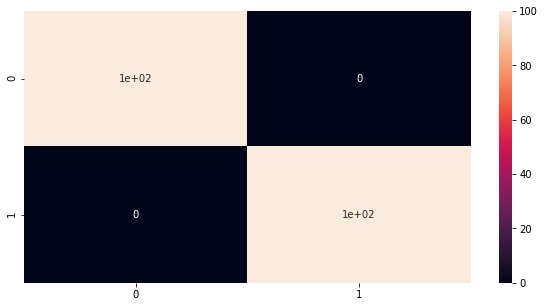

In [19]:
import seaborn as sns
plt.figure(figsize = (10, 5))
sns.heatmap(cm, annot=True)
plt.show()

In [20]:
import os.path
if os.path.isfile('D:/datasetcollection/models/mobilenet..h5') is False:
    model.save('D:/datasetcollection/mobilenet.h5')

In [21]:
from tensorflow.keras.models import load_model
new_model=load_model('D:/datasetcollection/mobilenet.h5')

In [22]:
new_model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
conv1_pad (ZeroPadding2D)    (None, 225, 225, 3)       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 112, 112, 32)      864       
_________________________________________________________________
conv1_bn (BatchNormalization (None, 112, 112, 32)      128       
_________________________________________________________________
conv1_relu (ReLU)            (None, 112, 112, 32)      0         
_________________________________________________________________
conv_dw_1 (DepthwiseConv2D)  (None, 112, 112, 32)      288       
_________________________________________________________________
conv_dw_1_bn (BatchNormaliza (None, 112, 112, 32)     